Sophia Godfrey

Student ID: 801149485

Homework 3

Intro to ML

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Load data
data = pd.read_csv("diabetes.csv")

(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add bias term
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (Binary Cross-Entropy)
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5  # to prevent log(0)
    cost = (-1/m) * np.sum(y*np.log(h + epsilon) + (1-y)*np.log(1-h + epsilon))
    return cost

In [ ]:
# Gradient Descent
def logistic_regression(X_train, y_train, X_test, y_test, alpha=0.01, epochs=200):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    train_costs, test_costs, train_acc, test_acc = [], [], [], []

    for i in range(epochs):
        # Predictions
        h = sigmoid(X_train @ theta)
        # Gradient
        gradient = (1/m) * X_train.T @ (h - y_train)
        theta -= alpha * gradient

        # Record cost and accuracy
        train_cost = compute_cost(X_train, y_train, theta)
        test_cost = compute_cost(X_test, y_test, theta)
        train_pred = (sigmoid(X_train @ theta) >= 0.5).astype(int)
        test_pred = (sigmoid(X_test @ theta) >= 0.5).astype(int)
        train_acc.append(metrics.accuracy_score(y_train, train_pred))
        test_acc.append(metrics.accuracy_score(y_test, test_pred))
        train_costs.append(train_cost)
        test_costs.append(test_cost)

    return theta, train_costs, test_costs, train_acc, test_acc

# Train model
theta, train_costs, test_costs, train_acc, test_acc = logistic_regression(X_train, y_train, X_test, y_test, alpha=0.1, epochs=250)

# Final predictions
y_pred = (sigmoid(X_test @ theta) >= 0.5).astype(int)

# Metrics
print("\nProblem 1: Diabetes Logistic Regression Results")
print(f"Accuracy:  {metrics.accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {metrics.precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {metrics.recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {metrics.f1_score(y_test, y_pred):.4f}")


Problem 1: Diabetes Logistic Regression Results
Accuracy:  0.8247
Precision: 0.7632
Recall:    0.6170
F1 Score:  0.6824


Text(0.5, 1.0, 'Problem 1: Confusion Matrix')

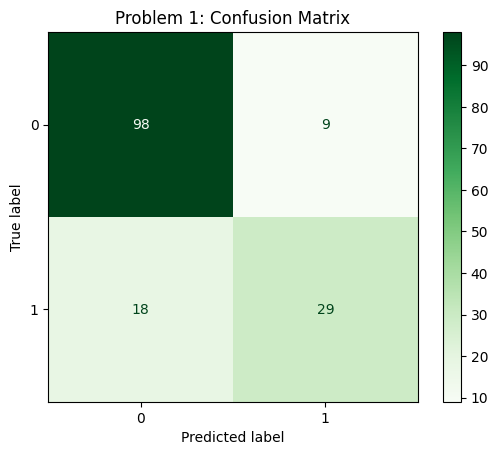

In [ ]:
# Confusion Matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Greens')
disp.ax_.set_title("Problem 1: Confusion Matrix")

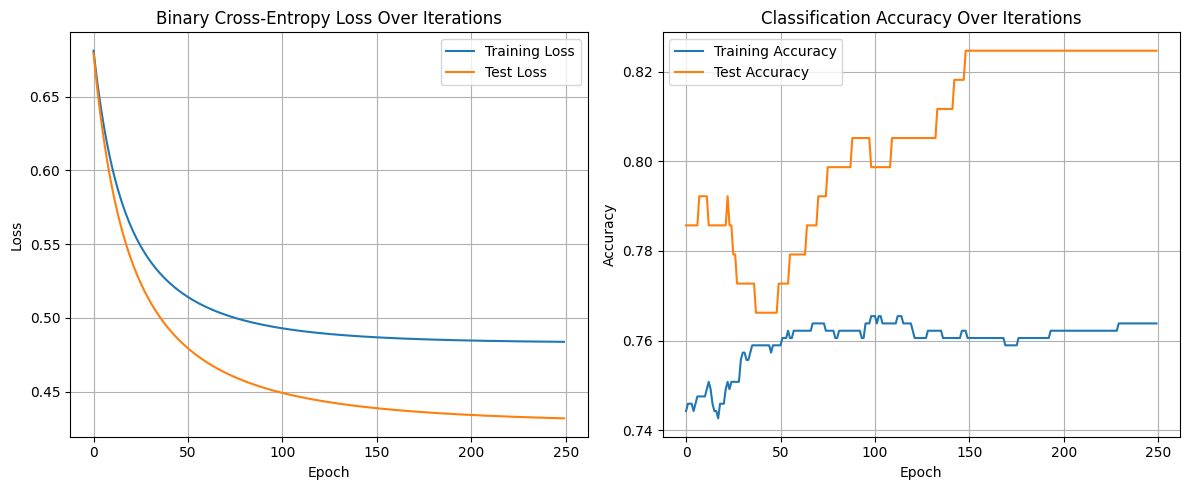

In [ ]:
# Plot cost and accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(train_costs, label='Training Loss')
ax[0].plot(test_costs, label='Test Loss')
ax[0].set_title("Binary Cross-Entropy Loss Over Iterations")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(test_acc, label='Test Accuracy')
ax[1].set_title("Classification Accuracy Over Iterations")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()